<h2> Tugas Besar Machine Learning</h2>
<br>
Nama: Faishal Raihanur Rasyid<br>
Kelas: IF-42-04<br>
NIM: 1301184163<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import math
import numpy as np
import seaborn as sns
import random as rd

<h2>Membaca Dataset</h2>

In [2]:
df_train = pd.read_csv('kendaraan_train.csv')
#df_test = pd.read_csv('kendaraan_test.csv')

In [3]:
display(df_train)
# display(df_train)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


<h2>Melihat Ukuran dan Tipe Data dari Dataset</h2>

In [4]:
df_train.shape

(285831, 12)

In [5]:
print(df_train.dtypes)

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object


 <h2>Melakukan Transformasi Atribut</h2>

In [6]:
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(['Pernah','Tidak'],[1,0])
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],[0,0.5,1])
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(['Wanita','Pria'],[0,1])

In [7]:
df_train.Kode_Daerah = df_train.Kode_Daerah.astype(object)
df_train.Kanal_Penjualan = df_train.Kanal_Penjualan.astype(object)

In [8]:
print(df_train.dtypes)
# print(df_train.dtypes)

id                     int64
Jenis_Kelamin        float64
Umur                 float64
SIM                  float64
Kode_Daerah           object
Sudah_Asuransi       float64
Umur_Kendaraan       float64
Kendaraan_Rusak      float64
Premi                float64
Kanal_Penjualan       object
Lama_Berlangganan    float64
Tertarik               int64
dtype: object


<h2>Mengecek Nilai Null di Dataset</h2>

In [9]:
display(df_train)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33,1.0,0.0,0.0,28029.0,152,97.0,0
1,2,1.0,48.0,1.0,39,0.0,1.0,1.0,25800.0,29,158.0,0
2,3,NaN,21.0,1.0,46,1.0,0.0,0.0,32733.0,160,119.0,0
3,4,0.0,58.0,1.0,48,0.0,0.5,0.0,2630.0,124,63.0,0
4,5,1.0,50.0,1.0,35,0.0,1.0,NaN,34857.0,88,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,23.0,1.0,4,1.0,0.0,0.0,25988.0,152,217.0,0
285827,285828,0.0,21.0,1.0,46,1.0,0.0,0.0,44686.0,152,50.0,0
285828,285829,0.0,23.0,1.0,50,1.0,0.0,0.0,49751.0,152,226.0,0
285829,285830,1.0,68.0,1.0,7,1.0,0.5,0.0,30503.0,124,270.0,0


In [10]:
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

<h2>Melakukan Pergantian nilai Null</h2>

In [11]:
df_train['Umur'].fillna(value=math.ceil(df_train['Umur'].mean()),inplace=True)
df_train['Premi'].fillna(value=math.ceil(df_train['Premi'].mean()),inplace=True)
df_train['Lama_Berlangganan'].fillna(value=math.ceil(df_train['Lama_Berlangganan'].mean()),inplace=True)
df_train['Umur_Kendaraan'].fillna(value=df_train['Umur_Kendaraan'].mode()[0],inplace=True)
df_train['Jenis_Kelamin'].fillna(value=df_train['Jenis_Kelamin'].mode()[0],inplace=True)
df_train['SIM'].fillna(value=df_train['SIM'].mode()[0],inplace=True)
df_train['Kode_Daerah'].fillna(value=df_train['Kode_Daerah'].mode()[0],inplace=True)
df_train['Sudah_Asuransi'].fillna(value=df_train['Sudah_Asuransi'].mode()[0],inplace=True)
df_train['Kendaraan_Rusak'].fillna(value=df_train['Kendaraan_Rusak'].mode()[0],inplace=True)
df_train['Kanal_Penjualan'].fillna(value=df_train['Kanal_Penjualan'].mode()[0],inplace=True)

In [12]:
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

<h2>Melihat Deskripsi dari Dataset</h2>

In [13]:
df_train.describe()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,142916.000000,0.563683,38.852077,0.997957,26.485220,0.435939,0.314644,0.529372,30536.699606,114.021530,154.321239,0.122471
std,82512.446734,0.495929,15.131646,0.045155,12.921482,0.495880,0.279809,0.499137,16712.080405,53.543345,81.620829,0.327830
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24929.000000,55.000000,85.000000,0.000000
50%,142916.000000,1.000000,38.000000,1.000000,28.000000,0.000000,0.500000,1.000000,30949.000000,152.000000,155.000000,0.000000
75%,214373.500000,1.000000,49.000000,1.000000,35.000000,1.000000,0.500000,1.000000,38845.000000,152.000000,223.000000,0.000000
max,285831.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


display(df_train)

<h2>Mengecek Nilai Pencilan/Outlier</h2>

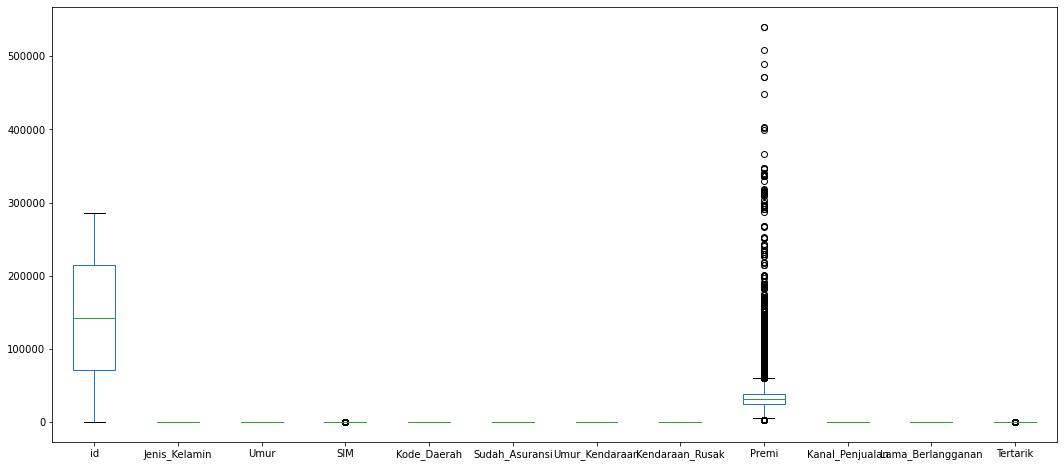

In [14]:
df_train.plot(kind='box', figsize=(18, 8))

<h2>Melakukan Pembersihan Nilai Pencilan/Outlier</h2>

In [15]:
Premi = df_train['Premi']
Premi =pd.DataFrame(Premi)
display(Premi)
Q1 = Premi.quantile(0.25)
Q3 = Premi.quantile(0.75)
IQR = Q3 - Q1
out = (Premi< (Q1 - 1.5 * IQR)) |(Premi> (Q3 + 1.5 * IQR))
Premi = Premi[~((Premi < (Q1 - 1.5 * IQR)) |(Premi > (Q3 + 1.5 * IQR))).any(axis=1)]
Premi.shape
Premi.reset_index()
df_train['Premi'] = Premi

,Premi
0,28029.0
1,25800.0
2,32733.0
3,2630.0
4,34857.0
...,...
285826,25988.0
285827,44686.0
285828,49751.0
285829,30503.0


In [16]:
df_train.isna().sum()

id                       0
Jenis_Kelamin            0
Umur                     0
SIM                      0
Kode_Daerah              0
Sudah_Asuransi           0
Umur_Kendaraan           0
Kendaraan_Rusak          0
Premi                55141
Kanal_Penjualan          0
Lama_Berlangganan        0
Tertarik                 0
dtype: int64

In [17]:
df_train['Premi'].fillna(value=math.ceil(df_train['Premi'].mean()),inplace=True)

In [18]:
# Premi.isna().sum()
# Premi.shape

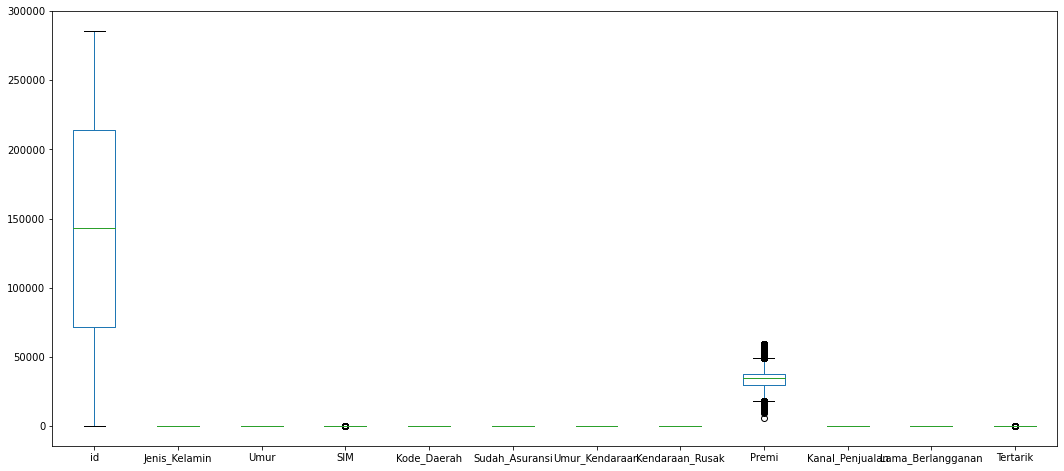

In [19]:
df_train.plot(kind='box', figsize=(18, 8))

<h2> Melakukan Scalling </h2>

In [20]:
# data = df_train.values[:,:-1]
trans = MinMaxScaler()
data = trans.fit_transform(df_train[['Umur','Premi','Lama_Berlangganan']])
data = pd.DataFrame(data)
data.rename(columns={0:'Umur',1:'Premi', 2:'Lama_Berlangganan',3:'Kendaraan_Rusak'}, inplace=True)
display(data)

,Umur,Premi,Lama_Berlangganan
0,0.153846,0.409000,0.301038
1,0.430769,0.367431,0.512111
2,0.015385,0.496727,0.377163
3,0.584615,0.528879,0.183391
4,0.461538,0.536338,0.636678
...,...,...,...
285826,0.046154,0.370937,0.716263
285827,0.015385,0.719643,0.138408
285828,0.046154,0.814103,0.747405
285829,0.738462,0.455139,0.899654


In [21]:
df_train['Umur'] = data['Umur']
df_train['Premi'] = data['Premi']
df_train['Lama_Berlangganan'] = data['Lama_Berlangganan']

<h2> Melihat Korelasi antar variabel </h2>

In [22]:
display(data)
display(df_train)

,Umur,Premi,Lama_Berlangganan
0,0.153846,0.409000,0.301038
1,0.430769,0.367431,0.512111
2,0.015385,0.496727,0.377163
3,0.584615,0.528879,0.183391
4,0.461538,0.536338,0.636678
...,...,...,...
285826,0.046154,0.370937,0.716263
285827,0.015385,0.719643,0.138408
285828,0.046154,0.814103,0.747405
285829,0.738462,0.455139,0.899654


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,0.153846,1.0,33.0,1.0,0.0,0.0,0.409000,152.0,0.301038,0
1,2,1.0,0.430769,1.0,39.0,0.0,1.0,1.0,0.367431,29.0,0.512111,0
2,3,1.0,0.015385,1.0,46.0,1.0,0.0,0.0,0.496727,160.0,0.377163,0
3,4,0.0,0.584615,1.0,48.0,0.0,0.5,0.0,0.528879,124.0,0.183391,0
4,5,1.0,0.461538,1.0,35.0,0.0,1.0,1.0,0.536338,88.0,0.636678,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,0.0,0.046154,1.0,4.0,1.0,0.0,0.0,0.370937,152.0,0.716263,0
285827,285828,0.0,0.015385,1.0,46.0,1.0,0.0,0.0,0.719643,152.0,0.138408,0
285828,285829,0.0,0.046154,1.0,50.0,1.0,0.0,0.0,0.814103,152.0,0.747405,0
285829,285830,1.0,0.738462,1.0,7.0,1.0,0.5,0.0,0.455139,124.0,0.899654,0


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,-0.001226,0.001692,-0.002603,0.002080,-0.002332,0.002682,0.002087,0.001398,-0.001264,0.000892,0.000972
Jenis_Kelamin,-0.001226,1.000000,0.135942,-0.015906,0.001435,-0.074485,0.149022,0.082619,0.039542,-0.105351,-0.001281,0.051317
Umur,0.001692,0.135942,1.000000,-0.075199,0.041443,-0.237190,0.719474,0.249284,0.175388,-0.541392,0.000139,0.107145
SIM,-0.002603,-0.015906,-0.075199,1.000000,-0.003182,0.015248,-0.034404,-0.016430,-0.012080,0.040482,-0.001200,0.009341
Kode_Daerah,0.002080,0.001435,0.041443,-0.003182,1.000000,-0.022552,0.040864,0.026271,-0.011150,-0.040780,-0.003547,0.009897
Sudah_Asuransi,-0.002332,-0.074485,-0.237190,0.015248,-0.022552,1.000000,-0.349443,-0.749782,-0.099240,0.203413,0.002671,-0.326014
Umur_Kendaraan,0.002682,0.149022,0.719474,-0.034404,0.040864,-0.349443,1.000000,0.364302,0.169062,-0.509340,-0.002203,0.213454
Kendaraan_Rusak,0.002087,0.082619,0.249284,-0.016430,0.026271,-0.749782,0.364302,1.000000,0.102444,-0.207298,-0.001253,0.337919
Premi,0.001398,0.039542,0.175388,-0.012080,-0.011150,-0.099240,0.169062,0.102444,1.000000,-0.157320,0.001527,0.049999
Kanal_Penjualan,-0.001264,-0.105351,-0.541392,0.040482,-0.040780,0.203413,-0.509340,-0.207298,-0.157320,1.000000,-0.000180,-0.135812


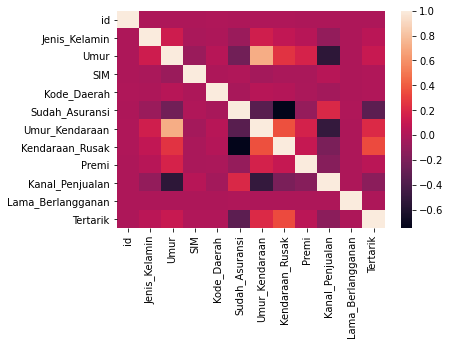

In [23]:
sns.heatmap(df_train.corr())
df_train.corr()

<h2>Melakukan export dataset yang telah diolah</h2>

In [24]:
df_train.to_csv('1301184163_Faishal Raihanur Rasyid.csv', index=False)

<h2> Melakukan PCA untuk Mereduksi Dimensi </h2>

In [25]:
# df_train = df_train[['Umur','Umur_Kendaraan','Kendaraan_Rusak']]
principal1 = df_train[['Umur','Premi','Umur_Kendaraan','Kendaraan_Rusak']]
pca = PCA(n_components=1)
principalComponents1 = pca.fit_transform(principal1)
principal1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1'])
# principalComponents2 = pca.fit_transform(principal2)
# principal2 = pd.DataFrame(data = principalComponents2
#              , columns = ['principal component 2'])
df_train = pd.concat([principal1, df_train['Lama_Berlangganan']], axis = 1)
# df_train = df_train[['Umur_Kendaraan','Sudah_Asuransi']]
display(df_train)

,principal component 1,Lama_Berlangganan
0,-0.618571,0.301038
1,0.662330,0.512111
2,-0.641321,0.377163
3,-0.385153,0.183391
4,0.674856,0.636678
...,...,...
285826,-0.640481,0.716263
285827,-0.632482,0.138408
285828,-0.622907,0.747405
285829,-0.358934,0.899654


<h2> Algoritma K-Means Clustering </h2>

<h3>Melakukan inisiasi centroid</h3>

In [26]:
def initializeCentroid(X,K):
        #random posisi centroid
        point=rd.randint(0,X.shape[0])
        centroids=np.array([X[point]])
        for k in range(1,K):
            distance=np.array([]) 
            for x in X:
                distance=np.append(distance,np.min(np.sum((x-centroids)**2)))
            prob=distance/np.sum(distance)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            centroids=np.append(centroids,[X[i]],axis=0)
        return centroids.T

<h3>Melakukan update letak centroid</h3>

In [27]:
def updateCentroid(K,C,centroids,X,Output):
        #Melakukakan update posisi centroid
        update={}
        for k in range(K):
            update[k+1]=np.array([]).reshape(2,0)
        for i in range(m):
            update[C[i]]=np.c_[update[C[i]],X[i]]
        
        for k in range(K):
            update[k+1]=update[k+1].T
        for k in range(K):
            centroids[:,k]=np.mean(update[k+1],axis=0)
        
        return update 

<h3>Melakukan K-Means Clustering</h3>

In [28]:
def kMean(K,X,centroids,n_iter,Output,m):
        #inisiasi random letak centroid di data
        centroids= initializeCentroid(X,K)
        #melakukan perhitungan jarak menggunakan euclidean distance dan menetapkan clustering dari data
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(m,0)
            for k in range(K):
                tempDist=np.sum((X-centroids[:,k])**2,axis=1)
                #print(tempDist)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
                #print(EuclidianDistance)
            C=np.argmin(EuclidianDistance,axis=1)+1
                
            Output=updateCentroid(K,C,centroids,X,Output)
        return Output,centroids.T

<h3>Melakukan perhitungan WCSS</h3>

In [29]:
def WCSS(Output,Centroids,K):
        wcss=0
        for k in range(K):
            wcss+=np.sum((Output[k+1]-Centroid[k,:])**2)
        return wcss

<h2>Inisiasi variabel untuk clustering</h2>

In [30]:
X = df_train.iloc[:2000,[0,1]].values
m=X.shape[0]
n_iter=100
Output={}
Centroid=np.array([]).reshape(X.shape[1],0)
print(m)
X.shape

2000


(2000, 2)

<h2> Main Program </h2>

In [31]:
# WCSS_array=np.array([])
# for K in range(1,6):
#     predict = kMean(K,X,Centroid,n_iter,Output,m)
#     Output = predict[0]
#     Centroid = predict[1]
# #     print("Output",Output)
# #     print("Centroid",Centroid)
#     wcss=0    
#     wcss = WCSS(Output,Centroid,K)
#     WCSS_array=np.append(WCSS_array,wcss)
#     color=['red','blue','green','cyan','magenta']
#     labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
#     for k in range(K):
#         plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#     plt.scatter(Centroid[:,0],Centroid[:,1],s=300,c='yellow',label='Centroids')
#     plt.title('Clustering')
#     plt.xlabel('Umur,Premi,Umur_Kendaraan,Kendaraan_Rusak')
#     plt.ylabel('Lama_Berlangganan')
#     plt.legend()
#     plt.show()

<h2> Elbow Method </h2>

{1: array([[-0.61857075,  0.30103806],
       [-0.38515347,  0.183391  ],
       [-0.64567535,  0.07266436],
       [-0.63965975,  0.11418685],
       [-0.61793466,  0.28373702],
       [-0.62983663,  0.3183391 ],
       [-0.64047515,  0.00692042],
       [-0.43168414,  0.22491349],
       [-0.43819747,  0.34602076],
       [-0.62935042,  0.30449827],
       [-0.64606231,  0.0899654 ],
       [-0.44046011,  0.27681661],
       [-0.41429692,  0.15224913],
       [-0.40845279,  0.15224913],
       [-0.6431597 ,  0.01038062],
       [-0.64697108,  0.03806228],
       [-0.63096765,  0.24221453],
       [-0.64522942,  0.08650519],
       [-0.48471321,  0.3183391 ],
       [-0.63735142,  0.17647059],
       [-0.63670444,  0.29065744],
       [-0.61527102,  0.25605536],
       [-0.33083611,  0.30795848],
       [-0.63130319,  0.30449827],
       [-0.63518123,  0.19723183],
       [-0.6343929 ,  0.31141869],
       [-0.62891287,  0.30795848],
       [-0.61090278,  0.22145329],
       [-0.45310

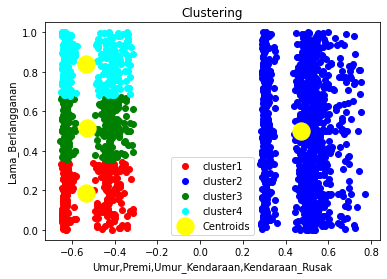

In [34]:

predict = kMean(K,X,Centroid,n_iter,Output,m)
Output = predict[0]
print(Output)
Centroid = predict[1]
wcss=0    
wcss = WCSS(Output,Centroid,K)
WCSS_array=np.append(WCSS_array,wcss)
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroid[:,0],Centroid[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clustering')
plt.xlabel('Umur,Premi,Umur_Kendaraan,Kendaraan_Rusak')
plt.ylabel('Lama_Berlangganan')
plt.legend()
plt.show()

In [93]:
data = Output[1]
# data = list(Output.items())
# data = Output.items()

df_result = pd.DataFrame(data,columns =['Pca component','Lama_berlangganan'])
df_result['Cluster'] = Output.keys()
df_result

ValueError: Length of values (4) does not match length of index (284)

In [ ]:
K_array=np.arange(1,6,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of K')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

<h2> Perbandingan K-Means dari scratch dan Library</h2>

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow method to determine optimum number of clusters')
plt.xlabel('Number of k')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Memvisualisasi K-Means
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Umur,Premi,Umur_Kendaraan,Kendaraan_Rusak')
plt.ylabel('Lama_Berlangganan')
plt.legend()
plt.show()